sources
https://en.wikipedia.org/wiki/Highest-paid_NBA_players_by_season
https://www.basketball-reference.com/contracts/salary-cap-history.html
https://www.basketball-reference.com/leagues/

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
#Data File Paths
salary_cap_path = "data/salary_caps.csv"
NBA_index_path = "data/NBA & ABA League Index (basketball-reference).csv"
NBA_payroll_path = "data/NBA_payrolls(1990-2021).csv"
NBA_totals_path = "data/NBA_totals (1990-2021).csv"
NBA_salaries_path = "data/highest salaries per year.csv"
milwaukee_salaries_path = "data/Milwaukee Salaries 2018-19.csv"
newyork_salaries_path = "data/New York Salaries 2018-19.csv"
champions_path = "data/NBA_Champions 1991-2019.csv"

#Read in CSVs
NBA_index_data = pd.read_csv(NBA_index_path)
NBA_totals_data = pd.read_csv(NBA_totals_path)
salary_cap_data = pd.read_csv(salary_cap_path)
NBA_payroll_data = pd.read_csv(NBA_payroll_path)
NBA_highest_salaries = pd.read_csv(NBA_salaries_path)
milwaukee_salaries = pd.read_csv(milwaukee_salaries_path)
newyork_salaries = pd.read_csv(newyork_salaries_path)
NBA_champions = pd.read_csv(champions_path)


In [3]:
# NBA Salary Cap Data from the 84-85 season to 20-21 season
salary_cap_data.head()

,Year,Salary Cap (USD)
0,1984-85,3600000
1,1985-86,4233000
2,1986-87,4945000
3,1987-88,6164000
4,1988-89,7232000


In [4]:
#Rename NBA totals columns to be more readable
NBA_totals_df = NBA_totals_data.rename(columns={"Tm": "Team", "G": "Games","W": "Wins", "L": "Losses", "W/L%": "% Wins and Losses"})
NBA_totals_df

,Season,Team,Games,Wins,Losses,% Wins and Losses
0,1990-91,Atlanta,82,43,39,0.524
1,1990-91,Boston,82,56,26,0.683
2,1990-91,Brooklyn,82,26,56,0.317
3,1990-91,Charlotte,82,61,21,0.744
4,1990-91,Chicago,82,33,49,0.402
...,...,...,...,...,...,...
901,2020-21,Sacramento,72,31,41,0.431
902,2020-21,San Antonio,72,33,39,0.458
903,2020-21,Toronto,72,27,45,0.375
904,2020-21,Utah,72,52,20,0.722


In [5]:
#Combine salary cap data with team payroll data from the 1984-85 season to 2020-21 season
payroll_data_merged_df = pd.merge(salary_cap_data, NBA_payroll_data, how="left", on=["Year", "Year"])
payroll_data_merged_df

,Year,Salary Cap (USD),Team,Team Payroll (USD),Current USD
0,1984-85,3600000,NaN,NaN,NaN
1,1985-86,4233000,NaN,NaN,NaN
2,1986-87,4945000,NaN,NaN,NaN
3,1987-88,6164000,NaN,NaN,NaN
4,1988-89,7232000,NaN,NaN,NaN
...,...,...,...,...,...
907,2020-21,109140000,Sacramento,106847430.0,106847430.0
908,2020-21,109140000,San Antonio,129648823.0,129648823.0
909,2020-21,109140000,Toronto,129131910.0,129131910.0
910,2020-21,109140000,Utah,136131324.0,136131324.0


In [6]:
#remove Na values any (payroll data earlier than 90-91 not available )
payroll_data_merged_df = payroll_data_merged_df.dropna(how='any')

payroll_data_merged_df


,Year,Salary Cap (USD),Team,Team Payroll (USD),Current USD
6,1990-91,11871000,Atlanta,11761000.0,23340645.0
7,1990-91,11871000,Boston,11256000.0,22338430.0
8,1990-91,11871000,Brooklyn,11410000.0,22644054.0
9,1990-91,11871000,Charlotte,10417000.0,20673368.0
10,1990-91,11871000,Chicago,10040000.0,19925184.0
...,...,...,...,...,...
907,2020-21,109140000,Sacramento,106847430.0,106847430.0
908,2020-21,109140000,San Antonio,129648823.0,129648823.0
909,2020-21,109140000,Toronto,129131910.0,129131910.0
910,2020-21,109140000,Utah,136131324.0,136131324.0


In [7]:
#Create new column containing the % salary cap used to standardize each year.
for row in payroll_data_merged_df.index:
    psc = (payroll_data_merged_df['Team Payroll (USD)'] / payroll_data_merged_df['Salary Cap (USD)']) * 100
      
salary_cap = payroll_data_merged_df['Salary Cap (USD)']
team = payroll_data_merged_df['Team']
season = payroll_data_merged_df['Year']
current_usd = payroll_data_merged_df['Current USD']
team_payroll = payroll_data_merged_df['Team Payroll (USD)']

NBA_payroll_df = pd.DataFrame({"Season": season,
                             "Team": team,
                             "Team Payroll (USD)": team_payroll,
                             "Current Value (USD)": current_usd,
                             "Salary Cap (USD)": salary_cap,
                             "% Salary Cap Used": psc
                            })
NBA_payroll_df = NBA_payroll_df.reset_index(drop=True)

NBA_payroll_df




,Season,Team,Team Payroll (USD),Current Value (USD),Salary Cap (USD),% Salary Cap Used
0,1990-91,Atlanta,11761000.0,23340645.0,11871000,99.073372
1,1990-91,Boston,11256000.0,22338430.0,11871000,94.819308
2,1990-91,Brooklyn,11410000.0,22644054.0,11871000,96.116587
3,1990-91,Charlotte,10417000.0,20673368.0,11871000,87.751664
4,1990-91,Chicago,10040000.0,19925184.0,11871000,84.575857
...,...,...,...,...,...,...
901,2020-21,Sacramento,106847430.0,106847430.0,109140000,97.899423
902,2020-21,San Antonio,129648823.0,129648823.0,109140000,118.791298
903,2020-21,Toronto,129131910.0,129131910.0,109140000,118.317675
904,2020-21,Utah,136131324.0,136131324.0,109140000,124.730918


In [8]:
#remove seasons 2019-20 and 2020-21 due to abnormal season from Covid-19
NBA_summary_df = pd.merge(NBA_payroll_df, NBA_totals_df, how="left", on=["Season", "Team"])
NBA_summary_df = NBA_summary_df.drop(labels=range(846, 906), axis=0)
NBA_summary_df


,Season,Team,Team Payroll (USD),Current Value (USD),Salary Cap (USD),% Salary Cap Used,Games,Wins,Losses,% Wins and Losses
0,1990-91,Atlanta,11761000.0,23340645.0,11871000,99.073372,82,43,39,0.524
1,1990-91,Boston,11256000.0,22338430.0,11871000,94.819308,82,56,26,0.683
2,1990-91,Brooklyn,11410000.0,22644054.0,11871000,96.116587,82,26,56,0.317
3,1990-91,Charlotte,10417000.0,20673368.0,11871000,87.751664,82,61,21,0.744
4,1990-91,Chicago,10040000.0,19925184.0,11871000,84.575857,82,33,49,0.402
...,...,...,...,...,...,...,...,...,...,...
841,2018-19,Sacramento,101466920.0,103805581.0,101869000,99.605297,82,39,43,0.476
842,2018-19,San Antonio,121588790.0,124391233.0,101869000,119.357989,82,48,34,0.585
843,2018-19,Toronto,137793831.0,140969781.0,101869000,135.265715,82,58,24,0.707
844,2018-19,Utah,113826156.0,116449685.0,101869000,111.737777,82,50,32,0.610


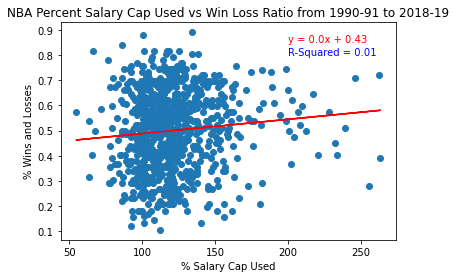

In [23]:
#scatter plot of "Percent Salary Cap Used vs NBA Win Loss Ratio from 1990-91 to 2018-19"
x_values = NBA_summary_df["% Salary Cap Used"]
y_values = NBA_summary_df["% Wins and Losses"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = rvalue**2
rvaluer = rvalue.round(2)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(200,0.85),fontsize=10,color="red")
plt.annotate((f'R-Squared = {rvaluer}'),(200,0.8),fontsize=10,color="blue")
plt.xlabel("% Salary Cap Used")
plt.ylabel("% Wins and Losses")
plt.title(f'NBA Percent Salary Cap Used vs Win Loss Ratio from 1990-91 to 2018-19')
plt.show()

In [10]:
team_groupby = NBA_summary_df.groupby(["Team"])
team_means = team_groupby.mean()
team_means.head()

,Team Payroll (USD),Current Value (USD),Salary Cap (USD),% Salary Cap Used,Games,Wins,Losses,% Wins and Losses
Team,,,,,,,,
Atlanta,5.034093e+07,6.432707e+07,4.653034e+07,112.355036,80.344828,39.000000,41.344828,0.487966
Boston,5.760672e+07,7.307807e+07,4.653034e+07,126.963006,80.310345,41.758621,38.551724,0.518586
Brooklyn,5.772130e+07,7.350642e+07,4.653034e+07,126.327321,80.344828,35.413793,44.931034,0.439655
Charlotte,4.904401e+07,6.096909e+07,4.686181e+07,103.107365,80.222222,43.185185,37.037037,0.535815
Chicago,5.341999e+07,6.815120e+07,4.653034e+07,119.831988,80.344828,40.482759,39.862069,0.501724


In [11]:
team_totals = team_groupby.sum()
team_totals.head()

,Team Payroll (USD),Current Value (USD),Salary Cap (USD),% Salary Cap Used,Games,Wins,Losses,% Wins and Losses
Team,,,,,,,,
Atlanta,1.459887e+09,1.865485e+09,1349380000,3258.296046,2330,1131,1199,14.151
Boston,1.670595e+09,2.119264e+09,1349380000,3681.927188,2329,1211,1118,15.039
Brooklyn,1.673918e+09,2.131686e+09,1349380000,3663.492304,2330,1027,1303,12.750
Charlotte,1.324188e+09,1.646165e+09,1265269000,2783.898866,2166,1166,1000,14.467
Chicago,1.549180e+09,1.976385e+09,1349380000,3475.127665,2330,1174,1156,14.550


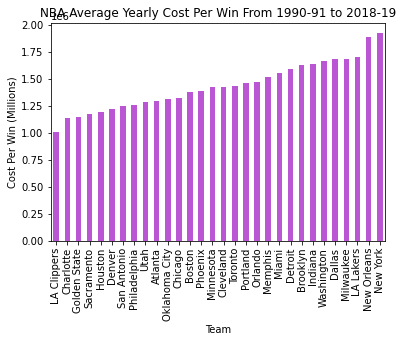

In [12]:
for row in team_means.index:
    average_cost_per_win = (team_means['Team Payroll (USD)'] / team_means['Wins'])
average_cost_per_win = average_cost_per_win.sort_values(ascending=True)
average_cost_per_win.plot(kind="bar",title="NBA Average Yearly Cost Per Win From 1990-91 to 2018-19", ylabel="Cost Per Win (Millions)", color="mediumorchid", width=0.5)

plt.show()

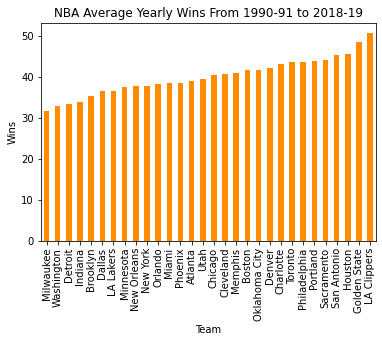

In [13]:
average_yearly_wins = team_means['Wins']                             
average_yearly_wins = average_yearly_wins.sort_values(ascending=True)
average_yearly_wins.plot(kind="bar",title="NBA Average Yearly Wins From 1990-91 to 2018-19", ylabel="Wins", color="darkorange", width=0.5)

plt.show()

In [14]:
nineteen_season_loc = NBA_summary_df.loc[NBA_summary_df["Season"]=="2018-19", ["Team", "Team Payroll (USD)", "Current Value (USD)", "Salary Cap (USD)", "% Salary Cap Used", "Games", "Wins", "Losses", "% Wins and Losses"]]
nineteen_season_df = nineteen_season.set_index('Team')
nineteen_season_df

NameError: name 'nineteen_season' is not defined

In [ ]:
x_values = nineteen_season_df["% Wins and Losses"]
y_values = nineteen_season_df["% Salary Cap Used"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = rvalue**2
valuer = rvalue.round(2)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.2,135),fontsize=10,color="red")
plt.annotate((f'R-Squared = {valuer}'),(0.2,140),fontsize=10,color="blue")
plt.xlabel("Percet Wins and Losses")
plt.ylabel("% Salary Cap Used")
plt.title(f'NBA Wins Vs Percent Salary Cap Used (2018-19)')
plt.show()

In [ ]:
for row in nineteen_season_df.index:
    nineteen_cost_per_win = (nineteen_season_df['Team Payroll (USD)'] / nineteen_season_df['Wins'])
nineteen_cost_sorted = nineteen_cost_per_win.sort_values(ascending=True)
nineteen_cost_sorted.plot(kind="bar",title="NBA Cost Per Win Efficiency (2018-19)", ylabel="Cost Per Win (Millions)", color="blue", width=0.5)
plt.show()

In [ ]:
nineteen_season_wins = nineteen_season_df['Wins']                             
nineteen_season_sorted = nineteen_season_wins.sort_values(ascending=False)
nineteen_season_sorted.plot(kind="bar",title="Wins Per Team (2018-19)", ylabel="Wins", color="red", width=0.5)

plt.show()

In [ ]:
x_values = nineteen_season_wins
y_values = nineteen_cost_per_win
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,0)) + "x + " + str(round(intercept,0))
rvalue = rvalue**2
valuer = rvalue.round(2)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 7000000),fontsize=10,color="red")
plt.annotate((f'R-Squared = {valuer}'),(40, 6000000),fontsize=10,color="blue")
plt.xlabel("2018-19 Wins")
plt.ylabel("2018-19 Cost Per Win (Millions)")
plt.title(f'2019 Cost Per Win Efficiency Vs Wins')
plt.show()

In [ ]:
#remove salary player with salary of $0
milwaukee_salaries = milwaukee_salaries.drop([20, 2])
milwaukee_salaries

In [ ]:
newyork_salaries

In [ ]:
milwaukee_salary_var = np.var(milwaukee_salaries['Salary'],ddof = 0)
milwaukee_salary_std = np.std(milwaukee_salaries['Salary'],ddof = 0)
milwaukee_highest_salary = milwaukee_salaries['Salary'].max()


newyork_salary_var = np.var(newyork_salaries['Salary'],ddof = 0)
newyork_salary_std = np.std(newyork_salaries['Salary'],ddof = 0)
newyork_highest_salary = newyork_salaries['Salary'].max()

salary_difference = milwaukee_highest_salary - newyork_highest_salary

variance_difference = newyork_salary_var - milwaukee_salary_var
std_difference = newyork_salary_std - milwaukee_salary_std
milwaukee_lowest_salary = milwaukee_salaries['Salary'].min()
newyork_lowest_salary = newyork_salaries['Salary'].min()
lowest_salary_difference = milwaukee_lowest_salary - newyork_lowest_salary

print(f"2018-19 Salary Variance of Most Winning Team (Milwaukee) to Least Winning Team (New York)")
print(f"------------------------------------------------------------------")
print(f"Milwaukee Salary Variance:  {milwaukee_salary_var}")
print(f"New York Salary Variance:   {newyork_salary_var}")
print(f"Salary Variance Difference: {variance_difference}")
print(f"------------------------------------------------------------------")
print(f"Milwaukee Salary Standard Deviation:  {milwaukee_salary_std}")
print(f"New York Salary Standard Deviation:   {newyork_salary_std}")
print(f"Salary Standard Deviation Difference: {std_difference}")
print(f"------------------------------------------------------------------")
print(f"Milwaukee's Highest Salary: {milwaukee_highest_salary}")
print(f"New York's Highest Salary:  {newyork_highest_salary}")
print(f"Highest Salary Difference:  {salary_difference}")
print(f"------------------------------------------------------------------")
print(f"Milwaukee's Lowest Salary: {milwaukee_lowest_salary}")
print(f"New York's Lowest Salary:  {newyork_lowest_salary}")
print(f"Lowest Salary Difference:  {lowest_salary_difference}")

In [ ]:
team_payroll_offset = NBA_summary_df.loc[NBA_summary_df["Season"] != "2016-17", ["Season", "Team", "Team Payroll (USD)", "% Salary Cap Used"]]
team_payroll_offset = team_payroll_offset.loc[NBA_summary_df["Season"] != "2017-18", ["Season", "Team", "Team Payroll (USD)", "% Salary Cap Used"]]
team_payroll_offset = team_payroll_offset.loc[NBA_summary_df["Season"] != "2018-19", ["Season", "Team", "Team Payroll (USD)", "% Salary Cap Used"]]
team_wins_offset = NBA_summary_df.loc[NBA_summary_df["Season"] != "1990-91", ["Season", "Team", "Wins"]]
team_wins_offset = team_wins_offset.loc[NBA_summary_df["Season"] != "1991-92", ["Season", "Team", "Wins"]]
team_wins_offset = team_wins_offset.loc[NBA_summary_df["Season"] != "1992-93", ["Season", "Team", "Wins"]]

team_payroll_offset


In [ ]:
#x_values = team_payroll_offset['% Salary Cap Used']
#y_values = team_wins_offset['Wins']
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,0)) + "x + " + str(round(intercept,0))
#rvalue = rvalue**2
#valuer = rvalue.round(2)
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(40, 7000000),fontsize=10,color="red")
#plt.annotate((f'R-Squared = {valuer}'),(40, 6000000),fontsize=10,color="blue")
#plt.xlabel("2018-19 Wins")
#plt.ylabel("2018-19 Cost Per Win (Millions)")
#plt.title(f'2019 Cost Per Win Efficiency Vs Wins')
#plt.show()

In [ ]:
NBA_highest_salaries


In [ ]:
highest_salaries_champions = pd.merge(NBA_highest_salaries, NBA_champions, how="left", on=["Season", "Season"])
highest_salaries_champions = highest_salaries_champions.dropna(how='any')
highest_salaries_champions = highest_salaries_champions.rename(columns={"Player": "Highest Paid Player", "Team": "Team of Player"})
highest_salaries_champions = highest_salaries_champions.set_index('Season')
highest_salaries_champions

In [ ]:
#highest_salary_count = highest_salaries_champions.loc[highest_salaries_champions["Team of Player"] == highest_salaries_champions["Champion"], ["Higest Paid Player", "Team of Player", "Salary", "Champion"]]
chicago = highest_salaries_champions.loc[(highest_salaries_champions["Team of Player"] == "Chicago") & (highest_salaries_champions["Champion"] == "Chicago"), :]

houston = highest_salaries_champions.loc[(highest_salaries_champions["Team of Player"] == "Houston") & (highest_salaries_champions["Champion"] == "Houston"), :]
san_antonio = highest_salaries_champions.loc[(highest_salaries_champions["Team of Player"] == "San Antonio") & (highest_salaries_champions["Champion"] == "San Antonio"), :]
lakers = highest_salaries_champions.loc[(highest_salaries_champions["Team of Player"] == "Lakers") & (highest_salaries_champions["Champion"] == "Lakers"), :]
detroit = highest_salaries_champions.loc[(highest_salaries_champions["Team of Player"] == "Detroit") & (highest_salaries_champions["Champion"] == "Detroit"), :]
miami = lakers = highest_salaries_champions.loc[(highest_salaries_champions["Team of Player"] == "Miami") & (highest_salaries_champions["Champion"] == "Miami"), :]
golden_state = lakers = highest_salaries_champions.loc[(highest_salaries_champions["Team of Player"] == "Golden State") & (highest_salaries_champions["Champion"] == "Golden State"), :]
cleveland = lakers = highest_salaries_champions.loc[(highest_salaries_champions["Team of Player"] == "cleveland") & (highest_salaries_champions["Champion"] == "cleveland"), :]

chicago_len = len(chicago)
san_antonio_len = len(san_antonio)
lakers_len = len(lakers)
detroit_len = len(detroit)
miami_len = len(miami)
golden_state_len = len(golden_state)
cleveland_len = len(cleveland)

total_champions_high = chicago_len + san_antonio_len + lakers_len + detroit_len + golden_state_len + cleveland_len + miami_len
total_champions_high
total_len = len(highest_salaries_champions)
total_len

In [ ]:
labels = ["% Champions With Highest Paid Player", "% Champions Without Highest Paid Player"]

# The values of each section of the pie chart
sizes = [total_champions_high, total_len]

# The colors of each section of the pie chart
colors = ["red", "orange"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title(f'Percentage of Teams That Won a NBA Championship With the Highest Paid Player (1991 to 2019)')
plt.show()